In [5]:
import json
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd

In [6]:
directory_path = "additional_weather_data"
file_list = glob.glob(directory_path + "/additional_weather_data*")
data_additional = {}
for file in file_list:
    with open(file, "r") as json_file:
        json_data = json.load(json_file)
        data_additional.update(json_data)

directory_path = "additional_weather_data"
file_list = glob.glob(directory_path + "/solar_data*")
data = {}
for file in file_list:
    with open(file, "r") as json_file:
        json_data = json.load(json_file)
        data.update(json_data)

In [7]:
for key in data_additional.keys():
    if key in data.keys():
        for freq in data_additional[key].keys():
            if freq != 'full':
                for month,value in data_additional[key][freq].items():
                    data[key][freq][month].update(value)
            else:
                data[key][freq].update(data_additional[key][freq])


with open('weather_data_final.json', 'w') as json_file:
    json.dump(data, json_file)


In [ ]:
with open('weather_data_final.json', 'r') as json_file:
    data = json.load(json_file)

In [8]:
month_names = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April',
    '05': 'May', '06': 'June', '07': 'July', '08': 'August',
    '09': 'September', '10': 'October', '11': 'November', '12': 'December'
}

units = {
    'particle density' : 'µg/m3',
    'cloud coverage' : '%',
    'relative humidity' : '%',
    'temperature': '°C'
}

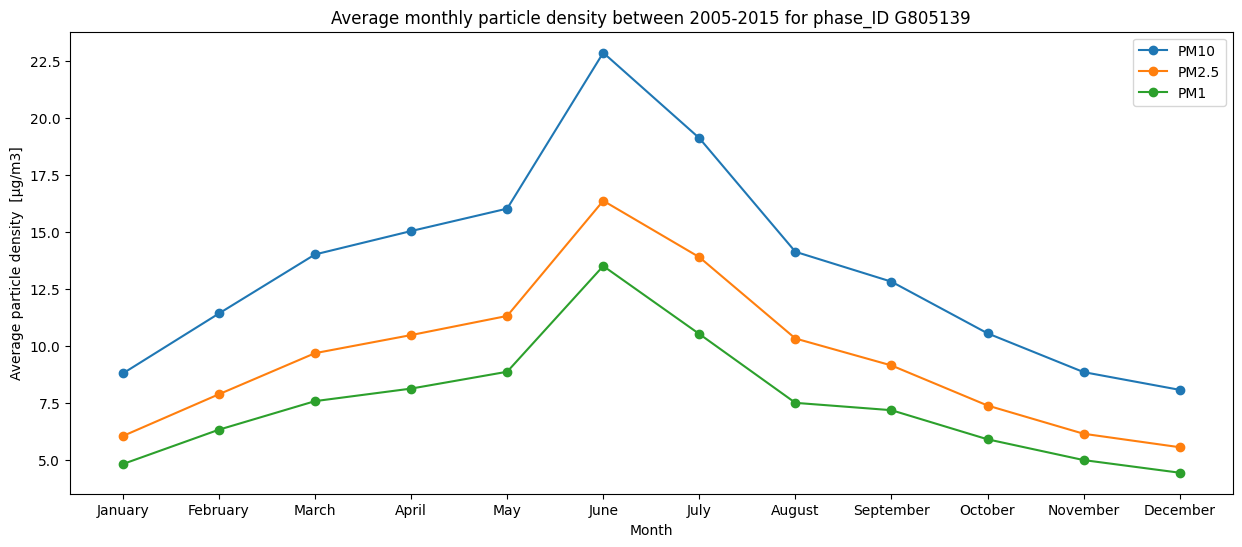

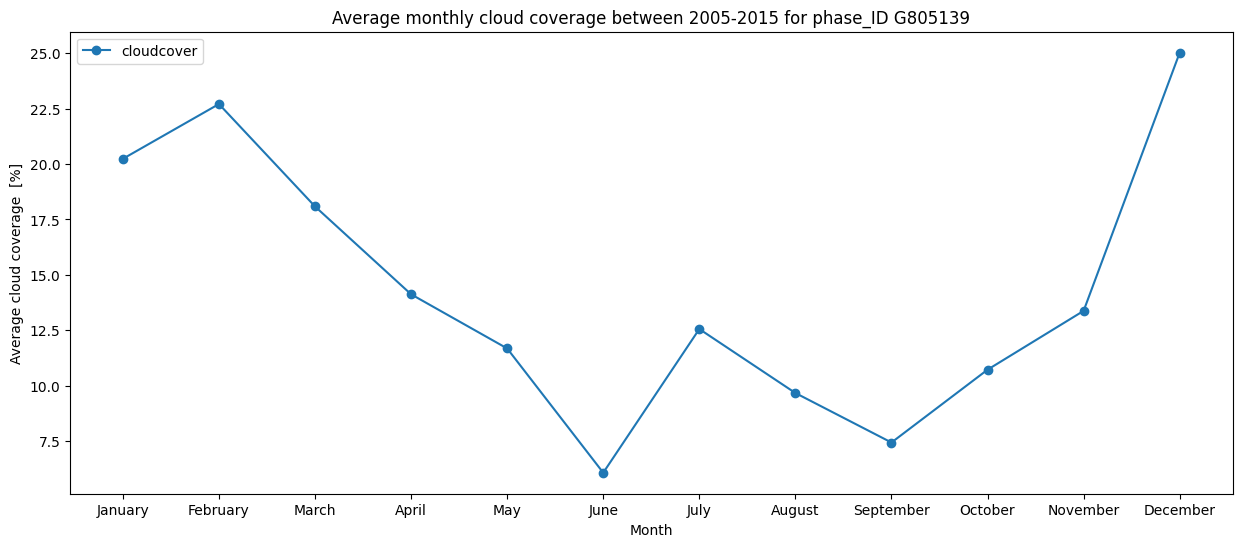

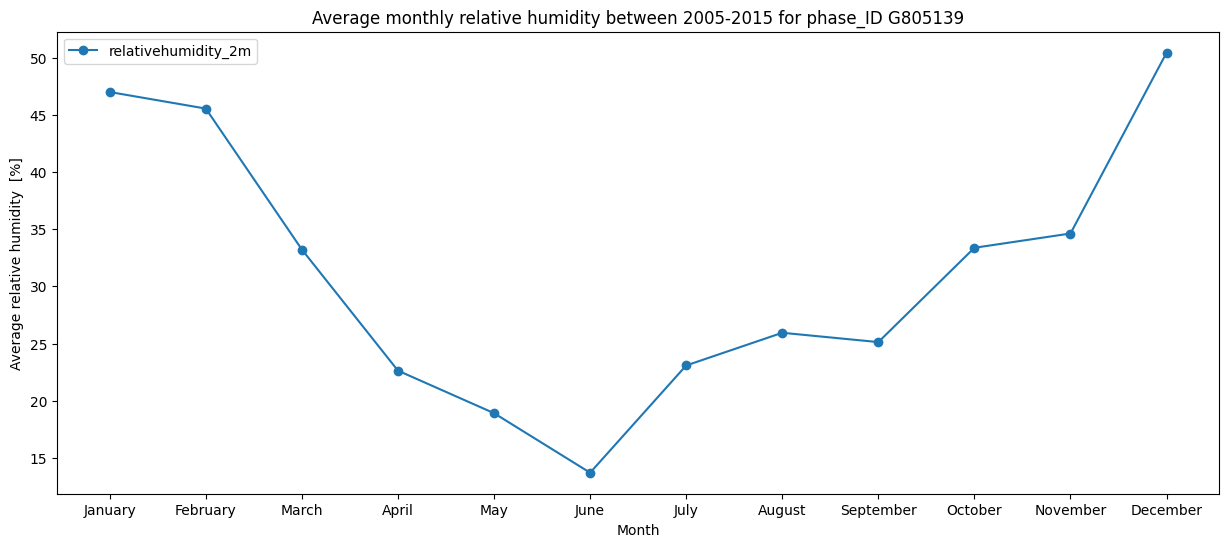

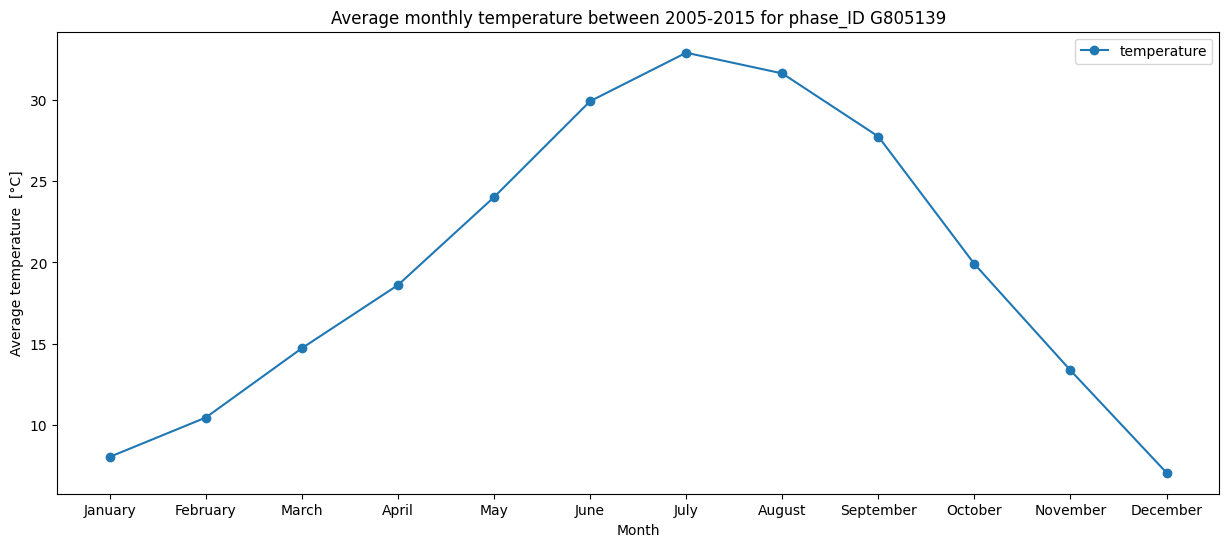

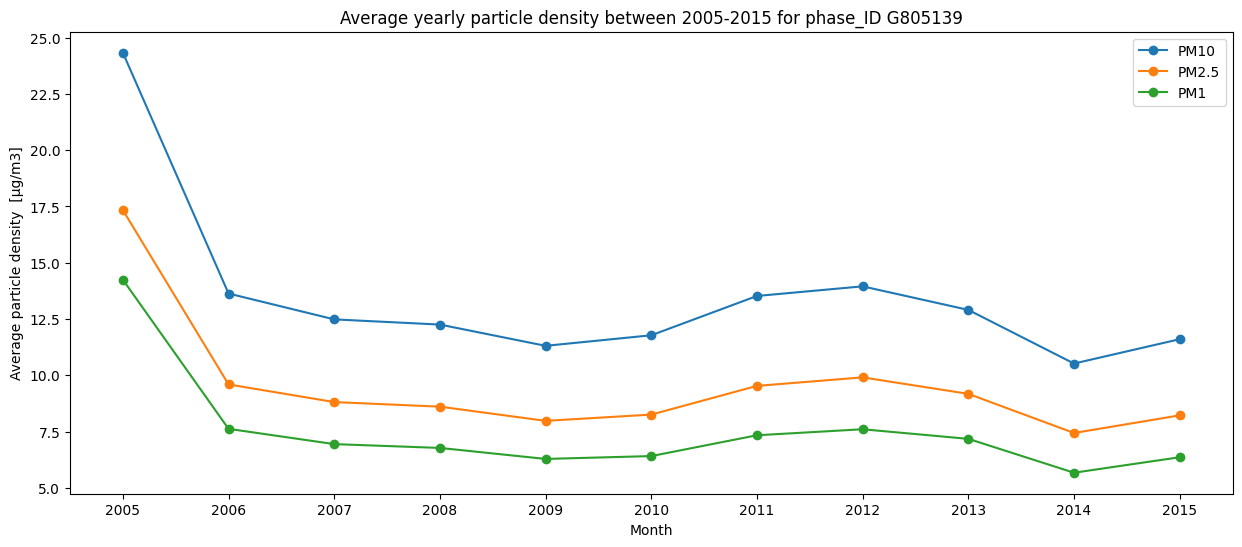

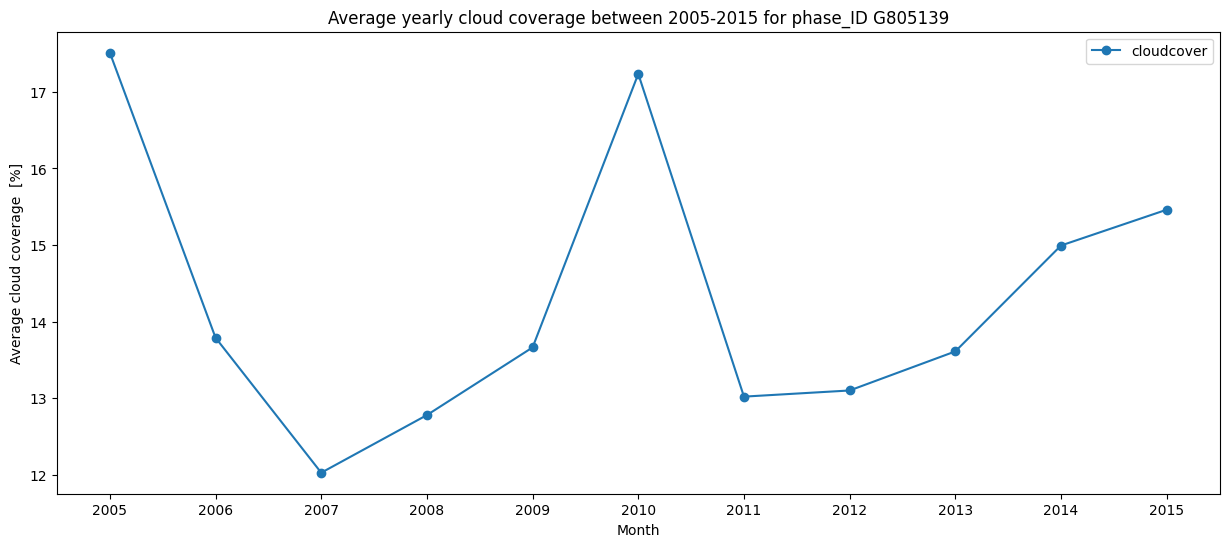

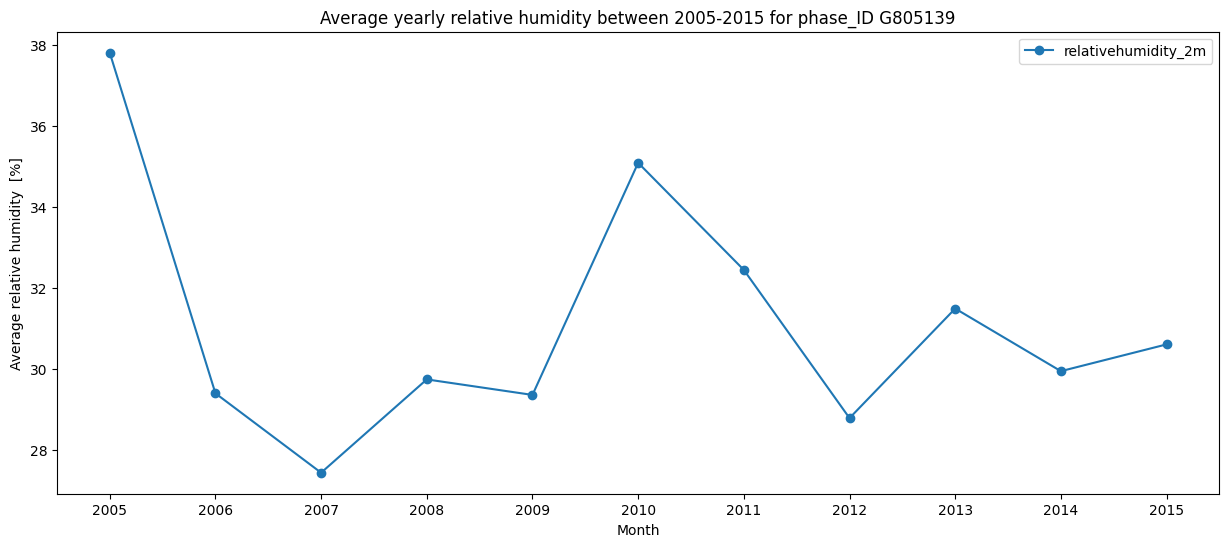

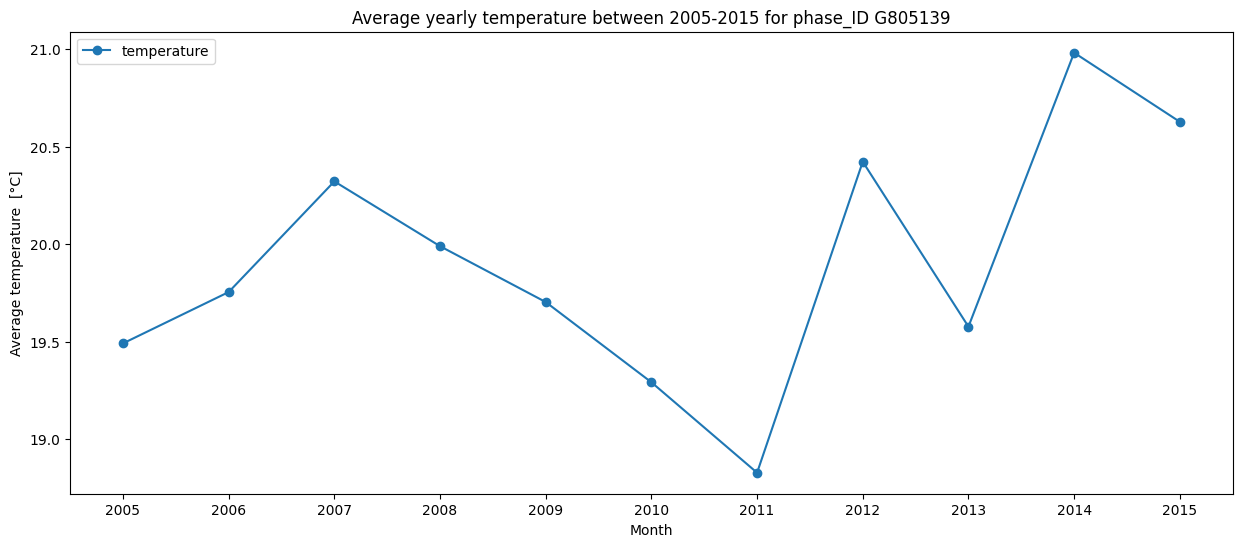

In [9]:
def get_statistical_value_plot(json_dict, phase_ID, frequency, statistical_value, list_of_parameters, label_of_plot):
    if frequency == "monthly":
        months = list(json_dict[phase_ID][frequency].keys())
        frequency_list = [month_names[month] for month in months]

        parametervalues = {parameter:[json_dict[phase_ID][frequency][month][parameter][statistical_value] for month in months] for parameter in list_of_parameters}

    elif frequency == "yearly":
        frequency_list = list(json_dict[phase_ID][frequency].keys())
        parametervalues = {parameter:[json_dict[phase_ID][frequency][year][parameter][statistical_value] for year in frequency_list] for parameter in list_of_parameters}


    plt.figure(figsize=(15, 6))
    for parameter in parametervalues.keys():
        plt.plot(frequency_list, parametervalues[parameter], marker='o', linestyle='-', label=parameter)
    plt.xlabel('Month')
    plt.ylabel('{} {}  [{}]'.format(statistical_value.capitalize(), label_of_plot,units[label_of_plot]))
    plt.title('{} {} {} between 2005-2015 for phase_ID {}'.format(statistical_value.capitalize(), frequency,label_of_plot,phase_ID))
    plt.legend()
    plt.show()


get_statistical_value_plot(data,'G805139','monthly', "average",['PM10', 'PM2.5', 'PM1'], "particle density")
get_statistical_value_plot(data,'G805139','monthly', "average",["cloudcover"], "cloud coverage")
get_statistical_value_plot(data,'G805139','monthly', "average",["relativehumidity_2m"], "relative humidity")
get_statistical_value_plot(data,'G805139','monthly', "average",["temperature"], "temperature")

get_statistical_value_plot(data,'G805139','yearly', "average",['PM10', 'PM2.5', 'PM1'], "particle density")
get_statistical_value_plot(data,'G805139','yearly', "average",["cloudcover"], "cloud coverage")
get_statistical_value_plot(data,'G805139','yearly', "average",["relativehumidity_2m"], "relative humidity")
get_statistical_value_plot(data,'G805139','yearly', "average",["temperature"], "temperature")